# 艺术家中的艺术家

覆盖基本方法，使一个艺术家（artist）可以包含另一个艺术家（artist）。在这种情况下，线条包含文本实例来标记它。

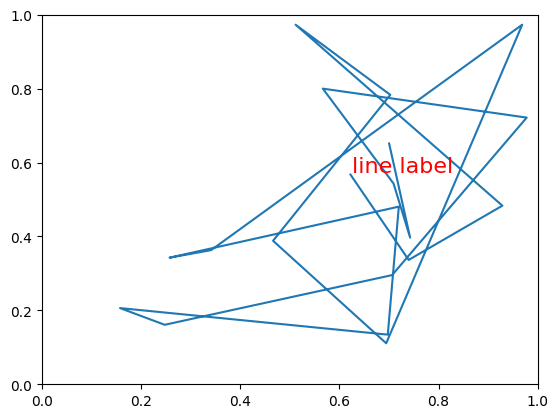

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.lines as lines
import matplotlib.text as mtext
import matplotlib.transforms as mtransforms


class MyLine(lines.Line2D):
    def __init__(self, *args, **kwargs):
        # we'll update the position when the line data is set
        self.text = mtext.Text(0, 0, '')
        super().__init__(*args, **kwargs)

        # we can't access the label attr until *after* the line is
        # initiated
        self.text.set_text(self.get_label())

    def set_figure(self, figure):
        self.text.set_figure(figure)
        super().set_figure(figure)

    # Override the Axes property setter to set Axes on our children as well.
    @lines.Line2D.axes.setter
    def axes(self, new_axes):
        self.text.axes = new_axes
        lines.Line2D.axes.fset(self, new_axes)  # Call the superclass property setter.

    def set_transform(self, transform):
        # 2 pixel offset
        texttrans = transform + mtransforms.Affine2D().translate(2, 2)
        self.text.set_transform(texttrans)
        super().set_transform(transform)

    def set_data(self, x, y):
        if len(x):
            self.text.set_position((x[-1], y[-1]))

        super().set_data(x, y)

    def draw(self, renderer):
        # draw my label at the end of the line with 2 pixel offset
        super().draw(renderer)
        self.text.draw(renderer)

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
x, y = np.random.rand(2, 20)
line = MyLine(x, y, mfc='red', ms=12, label='line label')
line.text.set_color('red')
line.text.set_fontsize(16)

ax.add_line(line)

plt.show()

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.lines`
   - `matplotlib.lines.Line2D`
   - `matplotlib.lines.Line2D.set_data`
   - `matplotlib.artist`
   - `matplotlib.artist.Artist`
   - `matplotlib.artist.Artist.draw`
   - `matplotlib.artist.Artist.set_transform`
   - `matplotlib.text`
   - `matplotlib.text.Text`
   - `matplotlib.text.Text.set_color`
   - `matplotlib.text.Text.set_fontsize`
   - `matplotlib.text.Text.set_position`
   - `matplotlib.axes.Axes.add_line`
   - `matplotlib.transforms`
   - `matplotlib.transforms.Affine2D`

